In [293]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [294]:
Ubicacion = r"C:\Users\randy\EBAC.PRACTICAS\drugs (1).csv"
df = pd.read_csv('drugs (1).csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [295]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


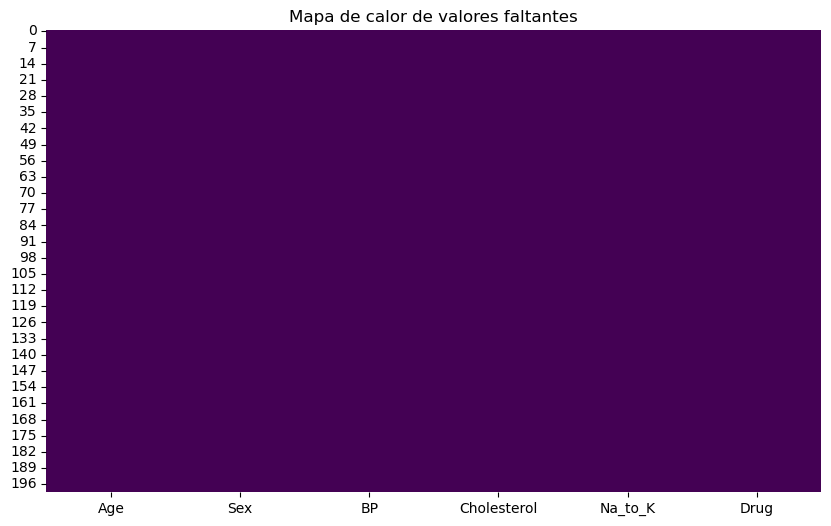

In [296]:
import seaborn as sns

# Generar un mapa de calor para detectar valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

In [297]:
# Checamos los valores de la variable a predecir 'Drug'
valores_unicos_Drug = df['Drug'].unique()
print(valores_unicos_Drug)

['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [298]:
# Checamos los valores de la variable 'Cholesterol' para identificar que modificaciones se le pueden hacer
valores_unicos_cholesterol = df['Cholesterol'].unique()
print(valores_unicos_cholesterol)

['HIGH' 'NORMAL']


In [299]:
# Checamos los valores de la variable 'BP' para identificar que modificaciones se le pueden hacer
valores_unicos_BP = df['BP'].unique()
print(valores_unicos_BP)

['HIGH' 'LOW' 'NORMAL']


In [300]:
# Checamos los valores de la variable 'BP' para identificar que modificaciones se le pueden hacer
valores_unicos_Drug = df['Drug'].unique()
print(valores_unicos_Drug)

['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [301]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [302]:
le = LabelEncoder()

In [303]:
# Codificamos las variables categóricas
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])  # Si esta es la variable objetivo

In [304]:
df.dtypes

Age              int64
Sex              int32
BP               int32
Cholesterol      int32
Na_to_K        float64
Drug             int32
dtype: object

In [305]:
feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = df[feature_cols]
y = df.Drug

In [306]:
# Creacion de las bases de entresnmiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Regresión Logística con Solucionador (Solver): sag

In [307]:
model = LogisticRegression(solver='sag')
clf = model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

# Impresion de los coeficientes
print('Intercept (Beta0)', clf.intercept_)
print('Pesos (Betas): ', clf.coef_)
print('-------------------------------------------------------')
# Estadisticas de desempeño
score = model.score(X_test, y_test)
print('Score de precision global:', score)
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercept (Beta0) [ 0.25207578 -0.08615411  0.08534729  0.29173555 -0.54300452]
Pesos (Betas):  [[-0.02659075  0.16102209 -0.64374796  0.05564697  0.1003734 ]
 [ 0.07156039 -0.04174398 -0.61906882 -0.0104194  -0.27710282]
 [-0.00370589  0.0127657   0.14632868 -0.2757111  -0.01628291]
 [ 0.01001018 -0.04951358  1.29155402  0.42877029 -0.11693387]
 [-0.05127393 -0.08253024 -0.17506592 -0.19828676  0.3099462 ]]
-------------------------------------------------------
Score de precision global: 0.7
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2
           2       0.00      0.00      0.00         4
           3       0.79      0.85      0.81        13
           4       0.75      0.88      0.81        17

    accuracy                           0.70        40
   macro avg       0.37      0.55      0.43        40
weighted av

# Regresión Logística con Solucionador (Solver): newton-cg

In [308]:
model = LogisticRegression(solver='newton-cg')
clf = model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

# Impresion de los coeficientes
print('Intercept (Beta0)', clf.intercept_)
print('Pesos (Betas): ', clf.coef_)
print('-------------------------------------------------------')
# Estadisticas de desempeño
score = model.score(X_test, y_test)
print('Score de precision global:', score)
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercept (Beta0) [ 14.92975078   0.87908514  10.25646689   6.24456603 -32.30986884]
Pesos (Betas):  [[-8.96233943e-02  3.54941861e-02 -2.31758766e+00 -4.79056881e-01
  -6.88045365e-01]
 [ 1.24903584e-01 -6.72367714e-02 -1.72770016e+00  8.90293254e-02
  -4.39128762e-01]
 [-2.62272325e-02 -8.10879580e-02  5.55542575e-01 -1.49469743e+00
  -6.08750699e-01]
 [-6.11395323e-03 -3.06446648e-01  3.07000042e+00  1.74859712e+00
  -5.84067240e-01]
 [-2.98921438e-03  4.19276859e-01  4.19741780e-01  1.36126972e-01
   2.31996180e+00]]
-------------------------------------------------------
Score de precision global: 0.95
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      1.00      0.67         2
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        17

   

# Regresión Logística con Solucionador (Solver): liblinear 

In [309]:
model = LogisticRegression(solver='liblinear')
clf = model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

# Impresion de los coeficientes
print('Intercept (Beta0)', clf.intercept_)
print('Pesos (Betas): ', clf.coef_)
print('-------------------------------------------------------')
# Estadisticas de desempeño
score = model.score(X_test, y_test)
print('Score de precision global:', score)
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercept (Beta0) [ 2.40746561 -0.69169247  0.59552877  0.49274606 -4.53305879]
Pesos (Betas):  [[-2.92140699e-02  4.44045986e-01 -2.27567481e+00 -3.95479579e-01
  -1.64992579e-01]
 [ 1.06714256e-01 -4.68494848e-01 -2.51665437e+00 -2.91727058e-01
  -4.28052683e-01]
 [-2.39661125e-03  5.01768347e-03 -5.76612086e-02 -1.77734484e+00
  -1.83201943e-01]
 [ 9.67804589e-03 -5.71764844e-01  3.03029788e+00  2.17470282e+00
  -4.65843053e-01]
 [-4.05475257e-02  5.57354674e-02 -2.72511077e-01 -4.43385662e-01
   4.48981390e-01]]
-------------------------------------------------------
Score de precision global: 0.825
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.40      1.00      0.57         2
           2       0.00      0.00      0.00         4
           3       0.81      1.00      0.90        13
           4       0.94      0.88      0.91        17

    acc

# Regresión Logística con Solucionador (Solver): saga

In [310]:
model = LogisticRegression(solver='saga')
clf = model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

# Impresion de los coeficientes
print('Intercept (Beta0)', clf.intercept_)
print('Pesos (Betas): ', clf.coef_)
print('-------------------------------------------------------')
# Estadisticas de desempeño
score = model.score(X_test, y_test)
print('Score de precision global:', score)
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercept (Beta0) [ 0.1281923  -0.05346107  0.04048128  0.1764519  -0.29166442]
Pesos (Betas):  [[-0.02418384  0.09159363 -0.38754955  0.03714532  0.08734973]
 [ 0.06544634 -0.01995966 -0.38608951 -0.00131636 -0.26881485]
 [-0.00366236  0.00611997  0.06842939 -0.14812718 -0.01987412]
 [ 0.01348848 -0.02592926  0.85867943  0.2277536  -0.08056311]
 [-0.05108862 -0.05182468 -0.15346975 -0.11545539  0.28190234]]
-------------------------------------------------------
Score de precision global: 0.725
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2
           2       0.00      0.00      0.00         4
           3       0.85      0.85      0.85        13
           4       0.76      0.94      0.84        17

    accuracy                           0.73        40
   macro avg       0.39      0.56      0.44        40
weighted 

# Regresión Logística con Solucionador (Solver): lbfgs

In [311]:
model = LogisticRegression(solver='lbfgs')
clf = model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

# Impresion de los coeficientes
print('Intercept (Beta0)', clf.intercept_)
print('Pesos (Betas): ', clf.coef_)
print('-------------------------------------------------------')
# Estadisticas de desempeño
score = model.score(X_test, y_test)
print('Score de precision global:', score)
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercept (Beta0) [ 2.30104765 -0.56738387  1.04349182  1.46124869 -4.23840429]
Pesos (Betas):  [[-0.03550946  0.6909232  -2.91327384 -0.30360455  0.06574731]
 [ 0.1102042  -0.4572076  -2.74886256 -0.30703636 -0.27225874]
 [-0.02012314  0.13536832  1.17440507 -1.75632459  0.00425809]
 [-0.01212402 -0.54988536  4.02268195  2.83663769 -0.37066596]
 [-0.04244758  0.18080144  0.46504939 -0.46967219  0.57291931]]
-------------------------------------------------------
Score de precision global: 0.85
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         2
           2       1.00      0.25      0.40         4
           3       0.81      1.00      0.90        13
           4       0.94      0.88      0.91        17

    accuracy                           0.85        40
   macro avg       0.85      0.78      0.75        40
weighted a

# podemos notar que el modelo que mejores estadisticas de desempeño fue 'Newton-cg' ya que otorgo un score global del 95% DE eficacia y dando un score F1 de 100%, 67%, 67%, 100, y 100% de fectividad para las los diferentes tipos de farmacos.

In [312]:
model = LogisticRegression(solver='newton-cg')
clf = model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

# Impresion de los coeficientes
print('Intercept (Beta0)', clf.intercept_)
print('Pesos (Betas): ', clf.coef_)
print('-------------------------------------------------------')
# Estadisticas de desempeño
score = model.score(X_test, y_test)
print('Score de precision global:', score)
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

Intercept (Beta0) [ 14.92975078   0.87908514  10.25646689   6.24456603 -32.30986884]
Pesos (Betas):  [[-8.96233943e-02  3.54941861e-02 -2.31758766e+00 -4.79056881e-01
  -6.88045365e-01]
 [ 1.24903584e-01 -6.72367714e-02 -1.72770016e+00  8.90293254e-02
  -4.39128762e-01]
 [-2.62272325e-02 -8.10879580e-02  5.55542575e-01 -1.49469743e+00
  -6.08750699e-01]
 [-6.11395323e-03 -3.06446648e-01  3.07000042e+00  1.74859712e+00
  -5.84067240e-01]
 [-2.98921438e-03  4.19276859e-01  4.19741780e-01  1.36126972e-01
   2.31996180e+00]]
-------------------------------------------------------
Score de precision global: 0.95
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      1.00      0.67         2
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        17

   

In [313]:
# Prediccion de probabilidades para casos particulares
y_pred_proba = clf.predict_proba(X_test)[:,1] # Probabilidad de clase 1
y_pred_proba[:5] # Primeras 5 probabilidades de clase 1

array([8.56522262e-04, 3.72793592e-07, 2.57821416e-03, 2.83993218e-03,
       7.12434264e-30])

In [314]:
y_test[:5] # Primeras 5 clase reales

58     3
40     4
34     3
102    2
184    4
Name: Drug, dtype: int32

In [315]:
y_test = y_test.to_numpy()
y_test[:5] 

array([3, 4, 3, 2, 4])

In [316]:
from sklearn.metrics import roc_curve, roc_auc_score

In [317]:
# Obtener probabilidades de predicción para cada clase
y_pred_proba = model.predict_proba(X_test)

# Calcular el AUC en formato multiclase
auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")  # También puedes probar "ovo"
print("AUC Score:", auc)

AUC Score: 1.0


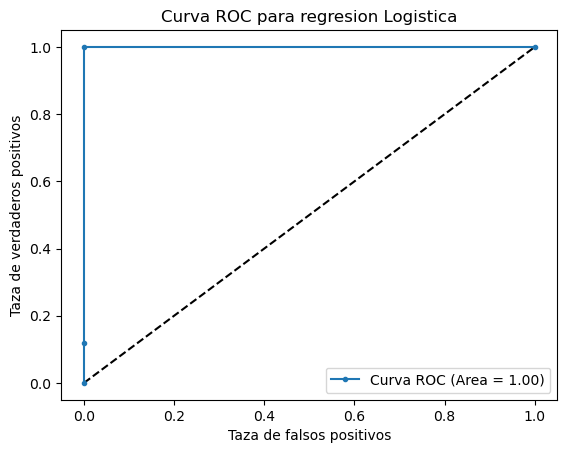

In [318]:

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, marker='.', label='Curva ROC (Area = %0.2f)' % auc)
plt.xlabel('Taza de falsos positivos')  # False positivos rate
plt.ylabel('Taza de verdaderos positivos')  # True positivos rate
plt.legend(loc= 'lower right')
plt.title('Curva ROC para regresion Logistica')
plt.show()

In [319]:
from sklearn.model_selection import cross_val_score

# Realizamos la validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Mostramos los resultados
print("Scores de validación cruzada:", cv_scores)
print("Promedio de los scores:", np.mean(cv_scores))
print("Desviación estándar de los scores:", np.std(cv_scores))

Scores de validación cruzada: [1.    0.975 1.    0.875 1.   ]
Promedio de los scores: 0.97
Desviación estándar de los scores: 0.04847679857416329
